# Visualization

In [ ]:
# import matplotlib.pyplot as plt
# plt.hist(x)
# plt.pie(x)
# plt.boxplot(x)

# plt.scatter(x,y)
# plt.bar(x,y)
# plt.barh(x,y)
# plt.plot(x,y)

# plt.figure(figsize)
# plt.title()
# plt.xlabel()
# plt.ylabel()
# plt.xlim()
# plt.ylim()
# plt.xticks()
# plt.yticks()
# plt.text()
# plt.xscale()
# plt.yscale()

## Case Study

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('projects.csv')
df

,score,type,num_of_positive_reviews,duration,gross,country,budget,year
0,7.9,Residential,723.0,178.0,760505847.0,USA,237000000.0,2009.0
1,7.1,Residential,302.0,169.0,309404152.0,USA,300000000.0,2007.0
2,6.8,Residential,602.0,148.0,200074175.0,UK,245000000.0,2015.0
3,8.5,Residential,813.0,164.0,448130642.0,USA,250000000.0,2012.0
4,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5038,7.7,Residential,1.0,87.0,NaN,Canada,NaN,2013.0
5039,7.5,Residential,43.0,43.0,NaN,USA,NaN,NaN
5040,6.3,Residential,13.0,76.0,NaN,USA,1400.0,2013.0
5041,6.3,Residential,14.0,100.0,10443.0,USA,NaN,2012.0


### Pre-processing

In [93]:
# verify nan values and drop them
df=df.dropna()

In [94]:
# reset the index
df=df.reset_index().drop('index', axis=1)

### Discover the dataset

In [16]:
df.shape

(3887, 8)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887 entries, 0 to 3886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   score                    3887 non-null   float64
 1   type                     3887 non-null   object 
 2   num_of_positive_reviews  3887 non-null   float64
 3   duration                 3887 non-null   float64
 4   gross                    3887 non-null   float64
 5   country                  3887 non-null   object 
 6   budget                   3887 non-null   float64
 7   year                     3887 non-null   float64
dtypes: float64(6), object(2)
memory usage: 243.1+ KB


In [28]:
# find the number of residential project vs Industerial Projects
tmpdf=df.type.value_counts()
tmpdf

Residential    3756
Industrial      131
Name: type, dtype: int64

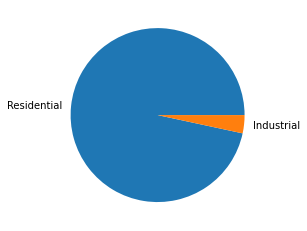

In [29]:
plt.pie(tmpdf.values, labels= tmpdf.index);

In [32]:
# find the number of projects in each country
tmpdf=df.country.value_counts()
tmpdf

USA               3072
UK                 325
France             106
Germany             82
Canada              64
Australia           41
Spain               22
Japan               17
China               14
India               13
Hong Kong           13
New Zealand         11
Italy               11
Mexico              11
Denmark              9
South Korea          9
Ireland              7
Brazil               5
Thailand             4
Norway               4
Iran                 4
Russia               3
Czech Republic       3
Argentina            3
Netherlands          3
Israel               3
South Africa         3
Romania              2
Taiwan               2
Hungary              2
Belgium              2
Iceland              2
Philippines          1
Chile                1
Sweden               1
Aruba                1
Indonesia            1
Peru                 1
Georgia              1
West Germany         1
Finland              1
Poland               1
Colombia             1
Official si

In [60]:
s=tmpdf[tmpdf>100]
s['Others']=tmpdf.values[tmpdf.values<100].sum()
s

USA       3072
UK         325
France     106
Others     384
Name: country, dtype: int64

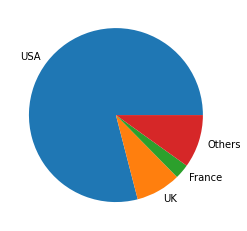

In [61]:
plt.pie(s.values, labels= s.index);

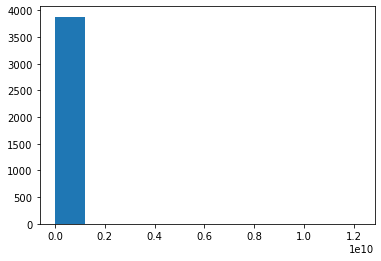

In [73]:
plt.hist(df['budget']);

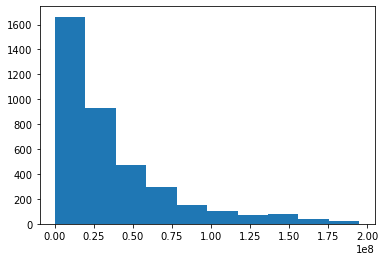

In [82]:
plt.hist(df.loc[df.budget<0.2e9,'budget']);

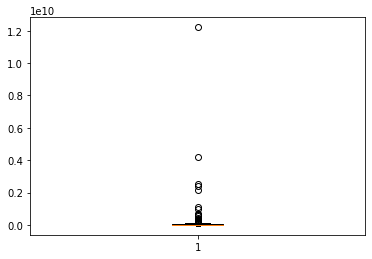

In [75]:
plt.boxplot(df['budget']);

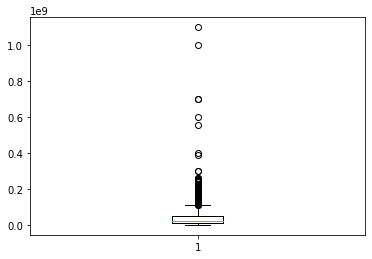

In [79]:
plt.boxplot(df.loc[df.budget<0.2e10,'budget']);

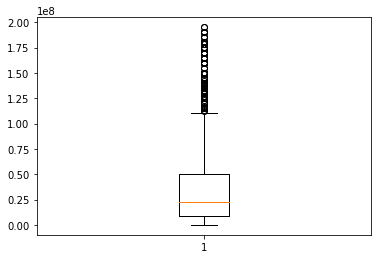

In [80]:
plt.boxplot(df.loc[df.budget<0.2e9,'budget']);

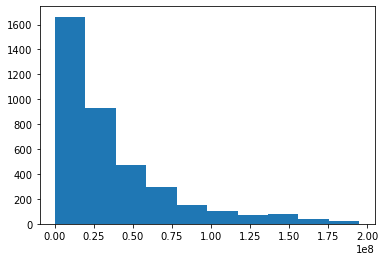

In [81]:
plt.hist(df.loc[df.budget<0.2e9,'budget']);

In [105]:
df=df.dropna()

In [112]:
mask=np.abs(df['budget']-df['budget'].mean())/df['budget'].std()<3
df['budget'][mask] # the good data

0       237000000.0
1       300000000.0
2       245000000.0
3       250000000.0
4       263700000.0
           ...     
3882         7000.0
3883         7000.0
3884         7000.0
3885         9000.0
3886         1100.0
Name: budget, Length: 3880, dtype: float64

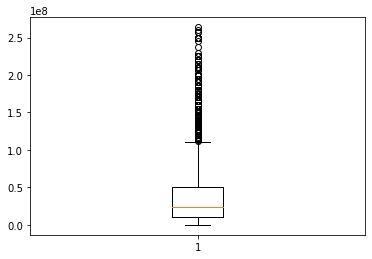

In [109]:
plt.boxplot(df['budget'][mask]);

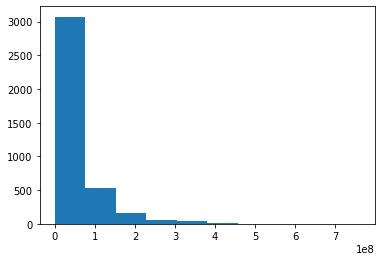

In [115]:

plt.hist(df.gross);

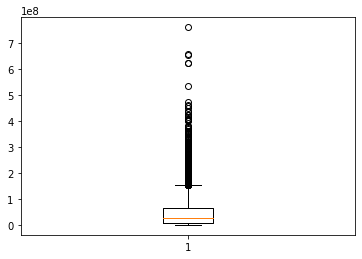

In [119]:
plt.boxplot(df.gross);

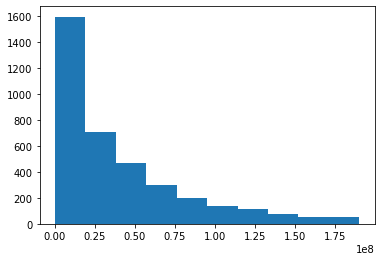

In [123]:
mask=(np.abs(df['gross']-df['gross'].mean())/df['gross'].std())<2
plt.hist(df.gross[mask]);

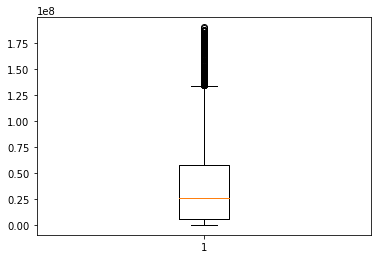

In [124]:
plt.boxplot(df.gross[mask]);

In [125]:
from scipy import stats

In [139]:
# np.abs(df['budget']-df['budget'].mean())/df['budget'].std()
stats.zscore(df.budget)

array([ 0.86199069,  1.14517159,  0.89795017, ..., -0.20327743,
       -0.20326844, -0.20330395])

In [137]:
np.abs(df['budget']-df['budget'].mean())/df['budget'].std()

0       0.861880
1       1.145024
2       0.897835
3       0.920306
4       0.981879
          ...   
3882    0.203251
3883    0.203251
3884    0.203251
3885    0.203242
3886    0.203278
Name: budget, Length: 3887, dtype: float64

In [135]:
# df.gross[(np.abs(df['gross']-df['gross'].mean())/df['gross'].std())<2]
df.gross[stats.zscore(df.gross)<2]

4        73058679.0
11      168368427.0
13       89289910.0
15      141614023.0
18      179020854.0
           ...     
3882       424760.0
3883        70071.0
3884      2040920.0
3885         4584.0
3886        85222.0
Name: gross, Length: 3704, dtype: float64

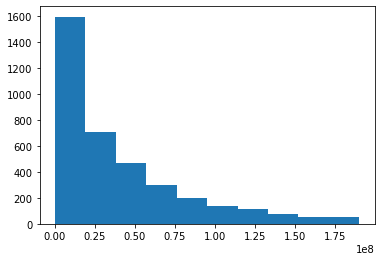

In [136]:
plt.hist(df.gross[stats.zscore(df.gross)<2]);

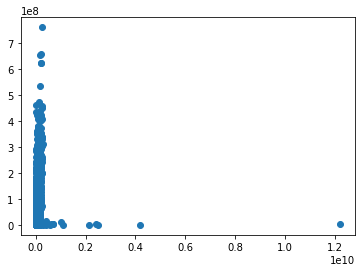

In [143]:
# realtion between two variables
tmpdf=df[['budget','gross']]
plt.scatter(tmpdf.budget, tmpdf.gross);

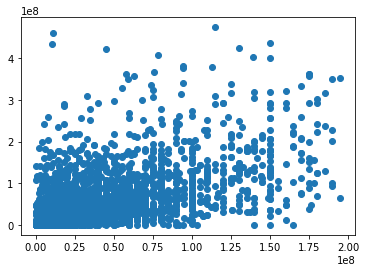

In [145]:
t=tmpdf.loc[(tmpdf.budget<0.2e9)&(tmpdf.gross<5e8)]  # clean data
plt.scatter(t.budget, t.gross);

In [148]:
tmpdf

,budget,gross
0,237000000.0,760505847.0
1,300000000.0,309404152.0
2,245000000.0,200074175.0
3,250000000.0,448130642.0
4,263700000.0,73058679.0
...,...,...
3882,7000.0,424760.0
3883,7000.0,70071.0
3884,7000.0,2040920.0
3885,9000.0,4584.0


In [151]:
tmpdf.apply(lambda x:stats.zscore(x)<3)

,budget,gross
0,True,False
1,True,False
2,True,True
3,True,False
4,True,True
...,...,...
3882,True,True
3883,True,True
3884,True,True
3885,True,True


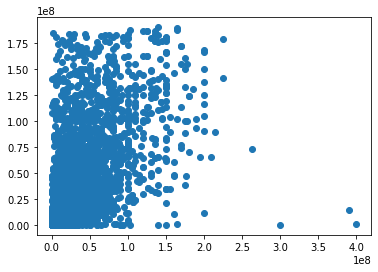

In [158]:
clean_data=tmpdf[tmpdf.apply(lambda x:stats.zscore(x)<2).all(axis=1)]
plt.scatter(clean_data.budget,clean_data.gross);

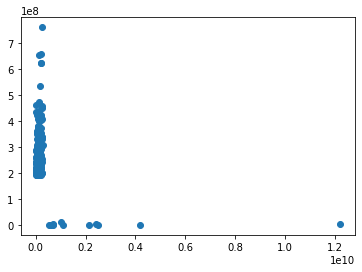

In [161]:
bad_data=tmpdf[tmpdf.apply(lambda x:stats.zscore(x)>2).any(axis=1)]
plt.scatter(bad_data.budget,bad_data.gross);

In [ ]:
## 

<BarContainer object of 10 artists>

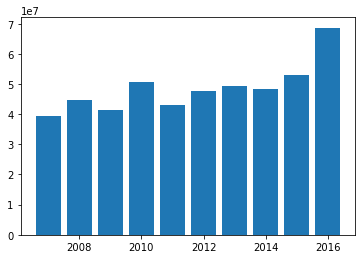

In [167]:
# mean budget of all projects in the last ten years
tmpdata=df.groupby('year').mean()['budget'].tail(10)
plt.bar(tmpdata.index, tmpdata.values)

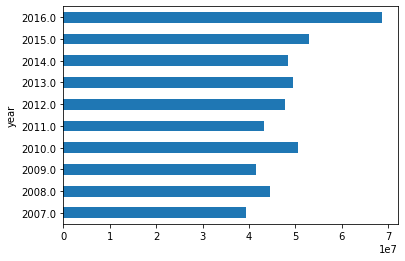

In [171]:
tmpdata.plot.barh();

In [179]:
# compare score of different types of project
tmpdf=df[['score','type']].dropna()

In [182]:
tmpdf.type.unique()

array(['Residential', 'Industrial'], dtype=object)

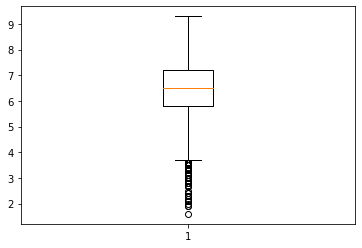

In [183]:
plt.boxplot(tmpdf.loc[tmpdf.type=='Residential','score']);

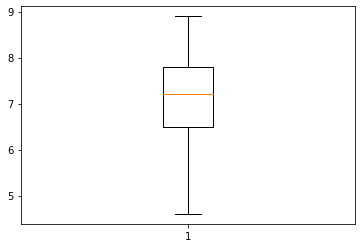

In [184]:
plt.boxplot(tmpdf.loc[tmpdf.type=='Industrial','score']);

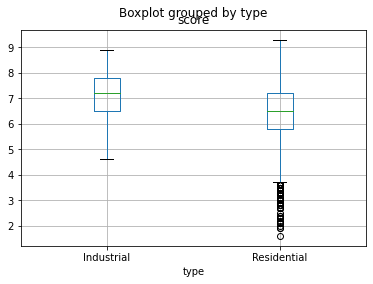

In [187]:
tmpdf.boxplot(by='type' ,column='score');

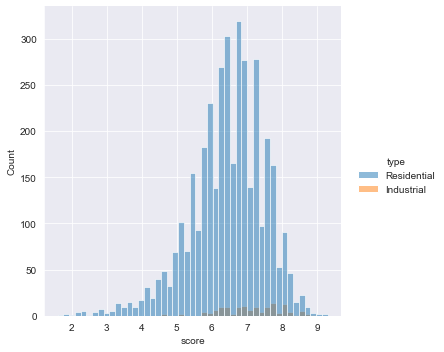

In [217]:
sns.displot(data=tmpdf, x='score', hue='type');

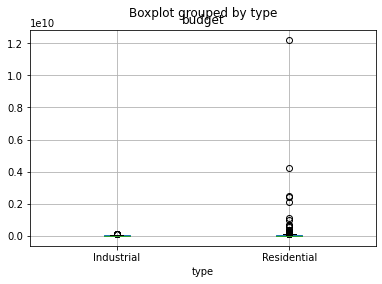

In [190]:
df.boxplot(by='type' ,column='budget');

## Seaborn

In [191]:
import seaborn as sns

In [194]:
df=sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [200]:
sns.set_style('darkgrid')

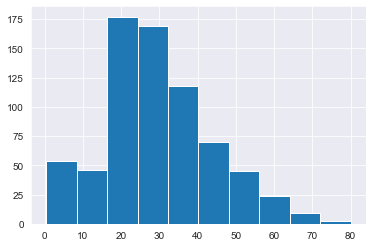

In [201]:
# displot
plt.hist(df.age);

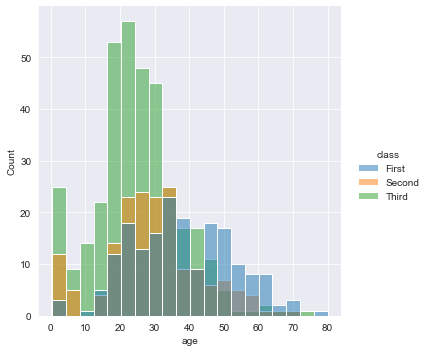

In [215]:
# sns.displot(df.age);
# sns.displot(data=df, x='age');
sns.displot(data=df, x='age', hue='class');

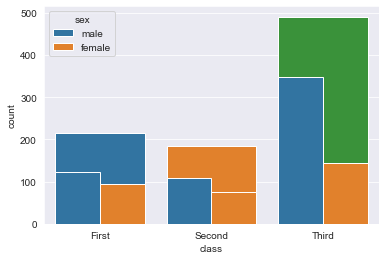

In [218]:
# countplot (categorical)
sns.countplot(data=df,x='class');
sns.countplot(data=df,x='class', hue='sex');

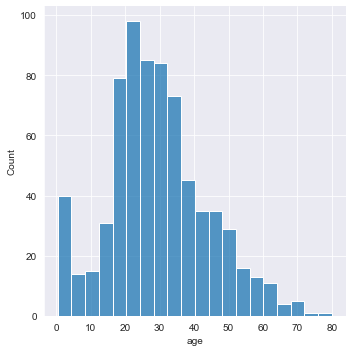

In [221]:
sns.displot(data=df, x='age')

<AxesSubplot:xlabel='age', ylabel='Density'>

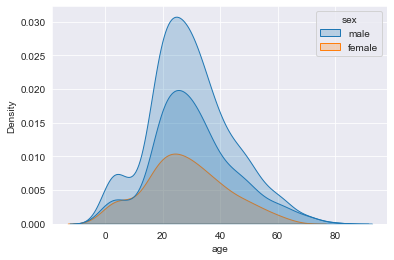

In [233]:
# kde
sns.kdeplot(data=df, x='age', shade=True)
sns.kdeplot(data=df, x='age', shade=True, hue='sex')

<AxesSubplot:xlabel='sex', ylabel='age'>

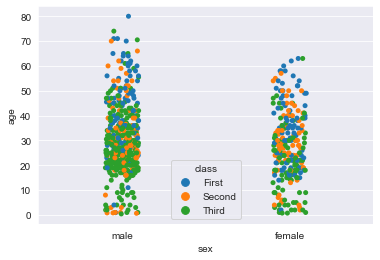

In [235]:
#scatterplots
# sns.scatterplot(data=df, x='age',y='fare')
# sns.scatterplot(data=df, x='age',y='fare', hue='sex')
# sns.stripplot(data=df, x='sex', y='age')
sns.stripplot(data=df, x='sex', y='age', hue='class')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='sex', ylabel='age'>

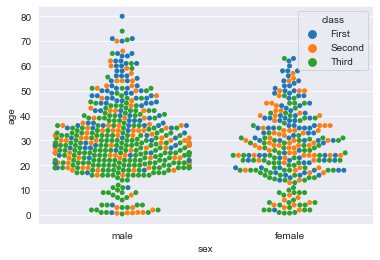

In [236]:
sns.swarmplot(data=df, x='sex', y='age')
sns.swarmplot(data=df, x='sex', y='age', hue='class')